# Mineração Estatística de Dados 2019
    Nome: Ricardo França Fernandes do Vale
    Número USP: 9293477

## 1. Leitura da base de dados

A base de dados é relativa a uma detecção de modos de transporte utilizados captados por sensores de smartphones.

In [1]:
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./dataset_5secondWindow%5B1%5D.csv', header=(0))
print(data.shape)
data.head(10)

(5893, 14)


,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car
5,559.0,9.330482,9.149029,9.520044,0.103857,0.000000,0.000000,0.000000,0.000000,57.361127,57.361127,57.361127,1.006611,Car
6,41.0,9.789771,9.758751,9.816197,0.013489,0.004100,0.002732,0.006579,0.001801,65.158369,65.158369,65.158369,0.000000,Train
7,20.0,9.906011,6.431646,14.202603,1.044684,0.140902,0.006567,0.690414,0.119667,0.000000,0.000000,0.000000,0.000000,Bus
8,35.0,9.639711,8.996134,10.027802,0.255053,0.041554,0.008014,0.123026,0.030074,89.808441,89.808441,89.808441,0.010171,Bus
9,27.0,9.602109,9.014786,10.068528,0.267791,0.037451,0.007174,0.084820,0.021391,89.815738,89.815738,89.815738,0.004995,Train


## 2. Pré-processamento dos dados

Serão aplicadas as seguintes operações sobre a base de dados:
- Remoção de unidades experimentais com dados faltantes;
- Remoção de unidades experimentais duplicadas.

In [2]:
data = data.dropna()
print(data.shape)
data.head(10)

(5893, 14)


,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car
5,559.0,9.330482,9.149029,9.520044,0.103857,0.000000,0.000000,0.000000,0.000000,57.361127,57.361127,57.361127,1.006611,Car
6,41.0,9.789771,9.758751,9.816197,0.013489,0.004100,0.002732,0.006579,0.001801,65.158369,65.158369,65.158369,0.000000,Train
7,20.0,9.906011,6.431646,14.202603,1.044684,0.140902,0.006567,0.690414,0.119667,0.000000,0.000000,0.000000,0.000000,Bus
8,35.0,9.639711,8.996134,10.027802,0.255053,0.041554,0.008014,0.123026,0.030074,89.808441,89.808441,89.808441,0.010171,Bus
9,27.0,9.602109,9.014786,10.068528,0.267791,0.037451,0.007174,0.084820,0.021391,89.815738,89.815738,89.815738,0.004995,Train


In [3]:
data = data.drop_duplicates(subset=data.columns[0:13], keep = False, inplace = False)
print(data.shape)
data.head(10)

(5893, 14)


,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car
5,559.0,9.330482,9.149029,9.520044,0.103857,0.000000,0.000000,0.000000,0.000000,57.361127,57.361127,57.361127,1.006611,Car
6,41.0,9.789771,9.758751,9.816197,0.013489,0.004100,0.002732,0.006579,0.001801,65.158369,65.158369,65.158369,0.000000,Train
7,20.0,9.906011,6.431646,14.202603,1.044684,0.140902,0.006567,0.690414,0.119667,0.000000,0.000000,0.000000,0.000000,Bus
8,35.0,9.639711,8.996134,10.027802,0.255053,0.041554,0.008014,0.123026,0.030074,89.808441,89.808441,89.808441,0.010171,Bus
9,27.0,9.602109,9.014786,10.068528,0.267791,0.037451,0.007174,0.084820,0.021391,89.815738,89.815738,89.815738,0.004995,Train


Como pudemos observar, não houve mudanças no dataset. Será removida a coluna "time" do dataset por estar mais próxima de uma indexação do que de um dado a ser analisado.

In [4]:
data = data.drop(data.columns[[0]], axis=1)
data.head(10)

,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car
5,9.330482,9.149029,9.520044,0.103857,0.000000,0.000000,0.000000,0.000000,57.361127,57.361127,57.361127,1.006611,Car
6,9.789771,9.758751,9.816197,0.013489,0.004100,0.002732,0.006579,0.001801,65.158369,65.158369,65.158369,0.000000,Train
7,9.906011,6.431646,14.202603,1.044684,0.140902,0.006567,0.690414,0.119667,0.000000,0.000000,0.000000,0.000000,Bus
8,9.639711,8.996134,10.027802,0.255053,0.041554,0.008014,0.123026,0.030074,89.808441,89.808441,89.808441,0.010171,Bus
9,9.602109,9.014786,10.068528,0.267791,0.037451,0.007174,0.084820,0.021391,89.815738,89.815738,89.815738,0.004995,Train


## 3. Utilização do KNN
O próximo passo será testar um classificador. O knn será testado para observar qual a quantidade de vizinhos a se considerar dada uma observação nova que gera a melhor acurácia. 

Será utilizada a divisão de conjuntos de treino e teste. A divisão de subconjuntos do dataset em treino e teste será testada em um intervalo de 30% a 90% do dataset destinados ao conjunto de treinamento, com aumento de 10% a cada iteração.

Primeiramente, ocorrerá o isolamento em Y dos rótulos das observações e em X, estarão os atributos (features) do dataset.

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split

list_labels = data.columns
Y = np.array(data[list_labels[-1]], dtype=str)
X = np.array(data[list_labels[0:12]])

Será aplicado, então, o KNN com um range de vizinhos em [1,51] e observado como é o desempenho do algoritmo ao longo do crescimento de k.

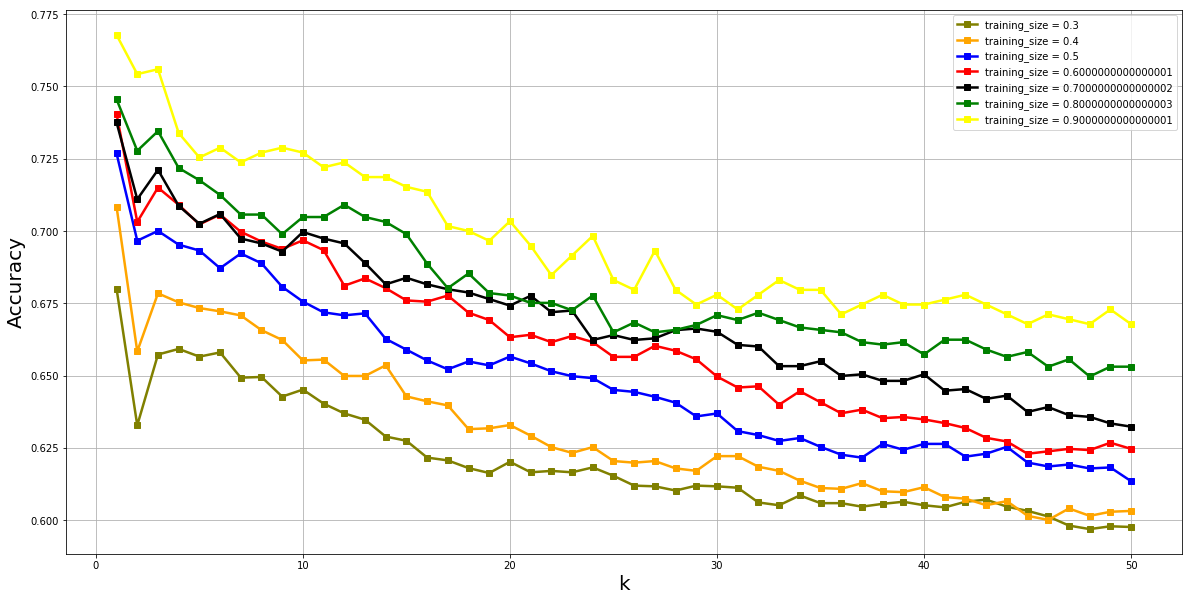

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline  

i = -1
colors = ['olive', 'orange', 'blue', 'red', 'black', 'green', 'yellow']
plt.figure(figsize=(20,10)) 
for p in np.arange(0.3, 0.9, 0.1):
    vscore = []
    vk = []
    i += 1
    # Definindo os holdouts utilizados 
    seed = 12
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = seed)
    for k in np.arange(1, 51):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        score = accuracy_score(pred_y, test_y)
        vscore.append(score)
        vk.append(k)
    plt.plot(vk, vscore, marker='s', linestyle='-', color=colors[i], linewidth=2.5, label='training_size = '+str(p))
    plt.xlabel("k", fontsize=20)
    plt.ylabel("Accuracy", fontsize=20)
    plt.grid(True)
plt.legend()
plt.show(True)
    

Interpretando graficamente, será escolhido o conjunto de treinamento com 80% com k = 3, por ter alta acurácia e representar parâmetros que não gerariam overfitting.

## 4. Comparação de classificadores

Os classificadores a serem comparados serão KNN (k=3), Naive Bayes e Decisão Bayesiana.

In [14]:
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB

# Definicao de função para aplicar classificadores
def caculate_accuracies(features, target, p=0.8):
    # Holdouts
    seed = 12
    train_x, test_x, train_y, test_y = train_test_split(features, target, test_size = 1-p, random_state = seed)

    #Calculos auxiliares
    classes = pd.unique(data[data.columns[-1]])
    classes = np.array(classes, dtype=str)

    # Decisão Bayesiana
    P = pd.DataFrame(data=np.zeros((train_x.shape[0], len(classes))), columns = classes)
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(train_y == classes[i]))
        Z = train_x[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,test_x.shape[0]):
            x = test_x[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv)
            P[classes[i]][j] = pj
    pred_y = []
    for i in np.arange(0, test_x.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        pred_y.append(classes[c])
    pred_y = np.array(pred_y, dtype=str)
    score = accuracy_score(pred_y, test_y)

    print('Acuracia - Decisao Bayesiana:', score)

    # Naive Bayes
    gnb = GaussianNB()
    gnb.fit(train_x,train_y)
    GaussianNB()
    pred_y= gnb.predict(test_x)
    score = accuracy_score(pred_y, test_y)
    print('Acuracia - Naive Bayes:', score)

    # KNN com k=3
    k = 3
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    score = accuracy_score(pred_y, test_y)
    print('Acuracia - KNN:', score)
    
caculate_accuracies(X, Y)

Acuracia - Decisao Bayesiana: 0.6183206106870229
Acuracia - Naive Bayes: 0.5250212044105174
Acuracia - KNN: 0.734520780322307


É notável que a acurácia do KNN é melhor que a dos demais classificadores devido aos métodos que esses algoritmos classificam os dados. O KNN se baseia na distância entre observações e os classificadores bayesianos utilizam do lado probabilístico para configurar seus respectivos vieses. Por isso, o próximo passo será realizar operações sobre o espaço de dados para observar se haverá diferença no comportamento dos classificadores.

## 5. Normalização e padronização dos dados

Primeiramente, vamos calcular a acurácia dos classificadores da seção anterior com os dados na distribuição normal padrão (média próxima a 0 e desvio padrão igual a 1). Em seguida, será medida acurácia nos dados normalizados no intervalo [0,1]. 

In [15]:
from sklearn.preprocessing import StandardScaler

# Padronização dos dados
scaler = StandardScaler().fit(X)
X_standard = scaler.transform(X)

#Aplicação dos classificadores
print('Para dados padronizados: ')
caculate_accuracies(X_standard, Y)

Para dados padronizados: 
Acuracia - Decisao Bayesiana: 0.6183206106870229
Acuracia - Naive Bayes: 0.5250212044105174
Acuracia - KNN: 0.7913486005089059


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)

#Aplicação dos classificadores
print('Para dados normalizados: ')
caculate_accuracies(X_norm, Y)

Para dados normalizados: 
Acuracia - Decisao Bayesiana: 0.6183206106870229
Acuracia - Naive Bayes: 0.5250212044105174
Acuracia - KNN: 0.7591178965224766


A acurácia do KNN possui melhorias nos dois casos, sendo a melhor performance nos dados padronizados. Os classificadores Bayesianos mantiveram sua acurácia.

## 6. Correlação entre os atributos

Será calculada a correlação entre atributos e, em seguida, reutilizados os classificadores anteriores em um dataset apenas com os atributos menos correlatos.

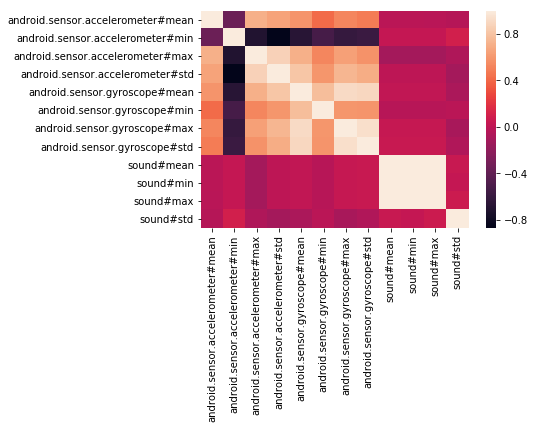

In [11]:
import seaborn

corr = data.corr()
seaborn.heatmap(corr)

Pelo gráfico acima, é possível perceber que há grupos de variáveis não correlacionadas: as variávies que medem o aclerômetro e o giroscópio com as variáveis de média, máximo e mínimo de som. Dessa forma, a maior proporção de atributos não-correlatos ocorre pela configuração atual do dataset. No entanto, podemos fazer a análise da classificação com alguns atributos não-correlatos, selecionando pelos pares menos correlatos. Pelos pares abaixo, serão escolhidos os atributos android.sensor.accelerometer#mean; android.sensor.gyroscope#min; sound#max; sound#std para serem mantidos

In [12]:
# Pares de atributos menos correlatos
p = 0.1
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) < p:
                var.append([i,j])
print('Variáveis menos correlacionadas:\n', var)

Variáveis menos correlacionadas:
 [['android.sensor.accelerometer#mean', 'sound#mean'], ['android.sensor.accelerometer#mean', 'sound#min'], ['android.sensor.accelerometer#mean', 'sound#max'], ['android.sensor.accelerometer#mean', 'sound#std'], ['android.sensor.accelerometer#min', 'sound#mean'], ['android.sensor.accelerometer#min', 'sound#min'], ['android.sensor.accelerometer#min', 'sound#max'], ['android.sensor.accelerometer#min', 'sound#std'], ['android.sensor.accelerometer#max', 'sound#std'], ['android.sensor.accelerometer#std', 'sound#mean'], ['android.sensor.accelerometer#std', 'sound#min'], ['android.sensor.accelerometer#std', 'sound#max'], ['android.sensor.gyroscope#mean', 'sound#mean'], ['android.sensor.gyroscope#mean', 'sound#min'], ['android.sensor.gyroscope#mean', 'sound#max'], ['android.sensor.gyroscope#mean', 'sound#std'], ['android.sensor.gyroscope#min', 'sound#mean'], ['android.sensor.gyroscope#min', 'sound#min'], ['android.sensor.gyroscope#min', 'sound#max'], ['android.s

In [17]:
data_reshape = data[data.columns[[0,5,10,11,12]]]

list_labels_reshape = data_reshape.columns
Y_reshape = np.array(data_reshape[list_labels_reshape[-1]], dtype=str)
X_reshape = np.array(data_reshape[list_labels_reshape[0:4]])

print('Para dados não correlacionados: ')
caculate_accuracies(X_reshape, Y_reshape)

Para dados não correlacionados: 
Acuracia - Decisao Bayesiana: 0.448685326547922
Acuracia - Naive Bayes: 0.42917726887192537
Acuracia - KNN: 0.6505513146734521


## 7. Robustez dos classificadores

Testaremos o comportamento dos classificadores da seção 4 com a presença de ruídos no dataset. 

In [131]:
# Definicao de função para aplicar classificadores e retornar acurácias
def return_accuracies(features, target, p=0.7):
    # Holdouts
    seed = 12
    train_x, test_x, train_y, test_y = train_test_split(features, target, test_size = 1-p, random_state = seed)

    #Calculos auxiliares
    classes = pd.unique(data[data.columns[-1]])
    classes = np.array(classes, dtype=str)

    # Decisão Bayesiana
    P = pd.DataFrame(data=np.zeros((train_x.shape[0], len(classes))), columns = classes)
    for i in np.arange(0, len(classes)):
        elements = tuple(np.where(train_y == classes[i]))
        Z = train_x[elements,:][0]
        m = np.mean(Z, axis = 0)
        cv = np.cov(np.transpose(Z))
        for j in np.arange(0,test_x.shape[0]):
            x = test_x[j,:]
            pj = multivariate_normal.pdf(x, mean=m, cov=cv)
            P[classes[i]][j] = pj
    pred_y = []
    for i in np.arange(0, test_x.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        pred_y.append(classes[c])
    pred_y = np.array(pred_y, dtype=str)
    bayes_score = accuracy_score(pred_y, test_y)

    # Naive Bayes
    gnb = GaussianNB()
    gnb.fit(train_x,train_y)
    GaussianNB()
    pred_y= gnb.predict(test_x)
    nb_score = accuracy_score(pred_y, test_y)
    
    # KNN com k=3
    k = 3
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_x,train_y)
    pred_y = model.predict(test_x)
    knn_score = accuracy_score(pred_y, test_y)
    return [bayes_score, nb_score, knn_score]

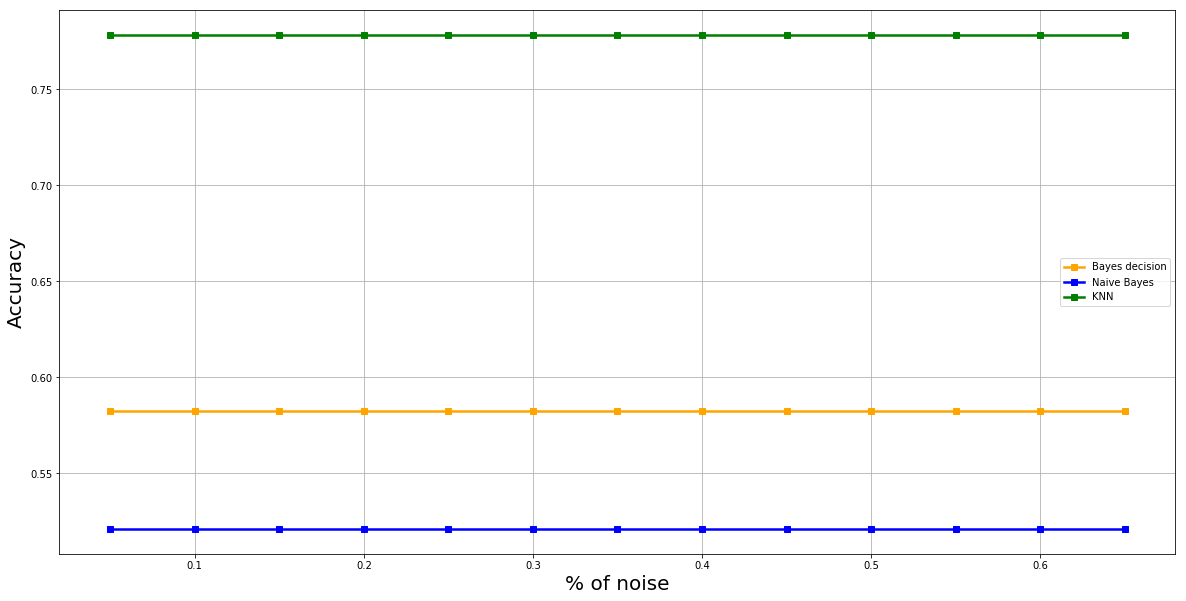

In [96]:
# Aplicando a normalização nos dados
scaler = StandardScaler().fit(X)
X_standard = scaler.transform(X)

# Atribunido ruido a X% dos exemplos
# a cada iteracao aumenta-se 5% dos X%

bayes_scores = []
nb_scores = []
knn_scores = []
colors = ['orange', 'blue', 'green']
noise = -3.2 # ruido a ser incluso

plt.figure(figsize=(20,10)) 
for part_size in np.arange(0.05, 0.7, 0.05):
    data_noise = data.copy()
    for count in np.arange(0, part_size*X_standard.shape[0]):
        j = np.random.randint(0,X_standard.shape[1])
        i = np.random.randint(0,X_standard.shape[0])
        data_noise[i, j] = noise

    # Renormalizando os atributos
    Y_noise = np.array(data_noise[list_labels[-1]], dtype=str)
    X_noise = np.array(data_noise[list_labels[0:12]])
    scaler = StandardScaler().fit(X_noise)
    X_noise_standard = scaler.transform(X_noise)

    #Aplicando classificadores ao dataset com ruido e normalizado
    [bayes_accuracy, nb_accuracy, knn_accuracy] = return_accuracies(X_noise_standard, Y_noise, 0.7)
    bayes_scores.append(bayes_accuracy)
    nb_scores.append(nb_accuracy)
    knn_scores.append(knn_accuracy)

vp = np.arange(0.05, 0.7, 0.05)
plt.plot(vp, bayes_scores, marker='s', linestyle='-', color=colors[0], linewidth=2.5, label='Bayes decision')
plt.plot(vp, nb_scores, marker='s', linestyle='-', color=colors[1], linewidth=2.5, label='Naive Bayes')
plt.plot(vp, knn_scores, marker='s', linestyle='-', color=colors[2], linewidth=2.5, label='KNN')
plt.xlabel("% of noise", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.legend()

plt.show(True)

De acordo com o que foi visto, ao incluir o ruído normalizado não há mudança de acurácias com a variação do ruído e isso pode ser o impacto da distribuição normal no espaço de dados. Mesmo nesta situação, o KNN mostra-se o algoritmo com maior acurácia do que os demais. 

## 8. Naive Bayes e variações


A seguir, será testado o classificador Naive Bayes diante de suas diferentes representações e, assim, será possível checar como a acurácia é imapactada pela escolha da função densidade de probabilidade do algoritmo.

In [104]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Dados normalizados
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)

# Dados sem tratamento
Y = np.array(data[list_labels[-1]], dtype=str)
X = np.array(data[list_labels[0:12]])

p=0.7

#Sem normalização
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 12)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(train_x,train_y)
mnb.fit(train_x,train_y)
bnb.fit(train_x,train_y)
GaussianNB()
MultinomialNB()
BernoulliNB()
pred_y_gnb= gnb.predict(test_x)
pred_y_mnb= mnb.predict(test_x)
pred_y_bnb= bnb.predict(test_x)

score_gnb = accuracy_score(pred_y_gnb, test_y)
score_mnb = accuracy_score(pred_y_mnb, test_y)
score_bnb = accuracy_score(pred_y_bnb, test_y)

print('Dados não normalizados')
print('Acuracia - Naive Bayes (Gaussian PDF):', score_gnb)
print('Acuracia - Naive Bayes (Multinomial PDF):', score_mnb)
print('Acuracia - Naive Bayes (Bernoulli PDF):', score_bnb)

#Com normalização
train_x, test_x, train_y, test_y = train_test_split(X_norm, Y, test_size = 1-p, random_state = 12)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(train_x,train_y)
mnb.fit(train_x,train_y)
bnb.fit(train_x,train_y)
GaussianNB()
MultinomialNB()
BernoulliNB()
pred_y_gnb= gnb.predict(test_x)
pred_y_mnb= mnb.predict(test_x)
pred_y_bnb= bnb.predict(test_x)

score_gnb = accuracy_score(pred_y_gnb, test_y)
score_mnb = accuracy_score(pred_y_mnb, test_y)
score_bnb = accuracy_score(pred_y_bnb, test_y)

print('\n\nDados com normalização [0,1]')
print('Acuracia - Naive Bayes (Gaussian PDF):', score_gnb)
print('Acuracia - Naive Bayes (Multinomial PDF):', score_mnb)
print('Acuracia - Naive Bayes (Bernoulli PDF):', score_bnb)

Dados não normalizados
Acuracia - Naive Bayes (Gaussian PDF): 0.5209276018099548
Acuracia - Naive Bayes (Multinomial PDF): 0.5231900452488688
Acuracia - Naive Bayes (Bernoulli PDF): 0.28846153846153844


Dados com normalização [0,1]
Acuracia - Naive Bayes (Gaussian PDF): 0.5209276018099548
Acuracia - Naive Bayes (Multinomial PDF): 0.5260180995475113
Acuracia - Naive Bayes (Bernoulli PDF): 0.28846153846153844


É possível observar um leve aumento na acurácia do Naive Bayes multinomial nos dados normalizados.

## 9. KNN e variação de distâncias

Serão testados vários tipos de KNN, modificando o tipo de distância a ser medida entre os atributos de entrada com os atributos do conjunto de treino. 

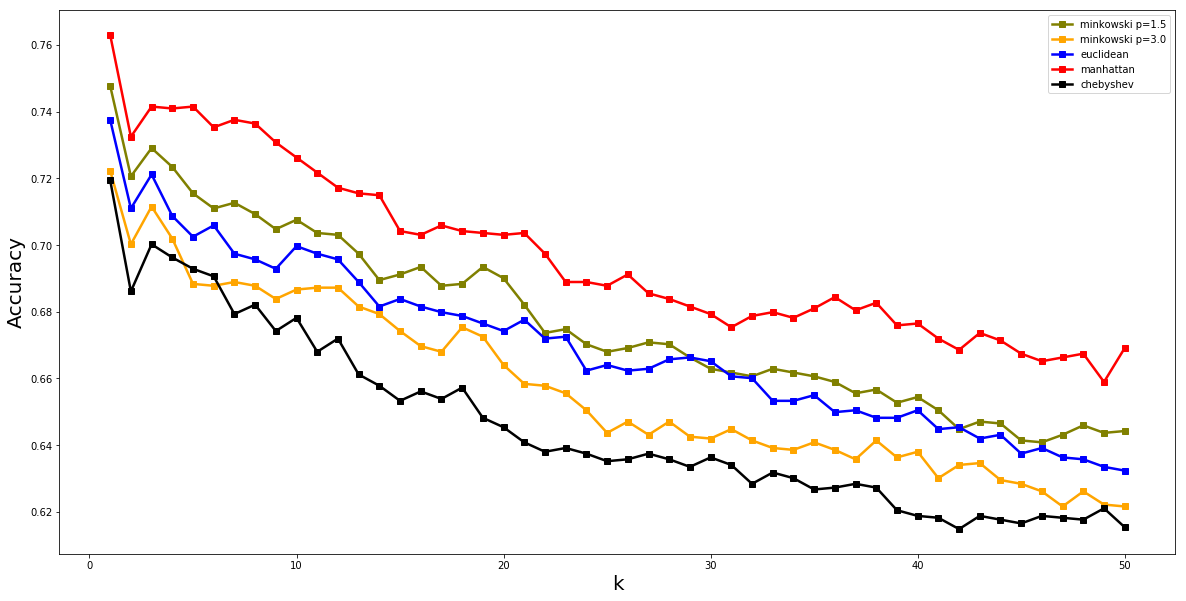

In [114]:
i = -1
colors = ['olive', 'orange', 'blue', 'red', 'black', 'green', 'yellow']
plt.figure(figsize=(20,10)) 
p = 0.7 
knn_score_euclidean = []
knn_score_manhattan = []
knn_score_chebyshev = []
knn_score_minkowsky15 = []
knn_score_minkowsky30 = []
vk = []
i += 1
# Definindo os holdouts utilizados 
seed = 12
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = seed)

for k in np.arange(1, 51):
    model_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model_euclidean.fit(train_x,train_y)
    pred_y_euclidean = model_euclidean.predict(test_x)
    score = accuracy_score(pred_y_euclidean, test_y)
    knn_score_euclidean.append(score)
    
    model_minkowski = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1.5)
    model_minkowski.fit(train_x,train_y)
    pred_y_minkowski = model_minkowski.predict(test_x)
    score = accuracy_score(pred_y_minkowski, test_y)
    knn_score_minkowsky15.append(score)
    
    model_minkowski = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    model_minkowski.fit(train_x,train_y)
    pred_y_minkowski = model_minkowski.predict(test_x)
    score = accuracy_score(pred_y_minkowski, test_y)
    knn_score_minkowsky30.append(score)
    
    model_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    model_chebyshev.fit(train_x,train_y)
    pred_y_chebyshev = model_chebyshev.predict(test_x)
    score = accuracy_score(pred_y_chebyshev, test_y)
    knn_score_chebyshev.append(score)
    
    model_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model_manhattan.fit(train_x,train_y)
    pred_y_manhattan = model_manhattan.predict(test_x)
    score = accuracy_score(pred_y_manhattan, test_y)
    knn_score_manhattan.append(score)
    
    vk.append(k)
plt.plot(vk, knn_score_minkowsky15, marker='s', linestyle='-', color=colors[0], linewidth=2.5, label='minkowski p=1.5')
plt.plot(vk, knn_score_minkowsky30, marker='s', linestyle='-', color=colors[1], linewidth=2.5, label='minkowski p=3.0')
plt.plot(vk, knn_score_euclidean, marker='s', linestyle='-', color=colors[2], linewidth=2.5, label='euclidean')
plt.plot(vk, knn_score_manhattan, marker='s', linestyle='-', color=colors[3], linewidth=2.5, label='manhattan')
plt.plot(vk, knn_score_chebyshev, marker='s', linestyle='-', color=colors[4], linewidth=2.5, label='chebyshev')
plt.xlabel("k", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend()
plt.show(True)

A distância de Manhttan possui um desempenho melhor no KNN independente do tamanho de k.

## 10. Comparação de classificadores variando o tamanho de holdout

Por fim, será exibido um benchmark dos classificadores ajustando o tamanho do conjunto de treino de 10 a 90%.

Acurácias sem padronização


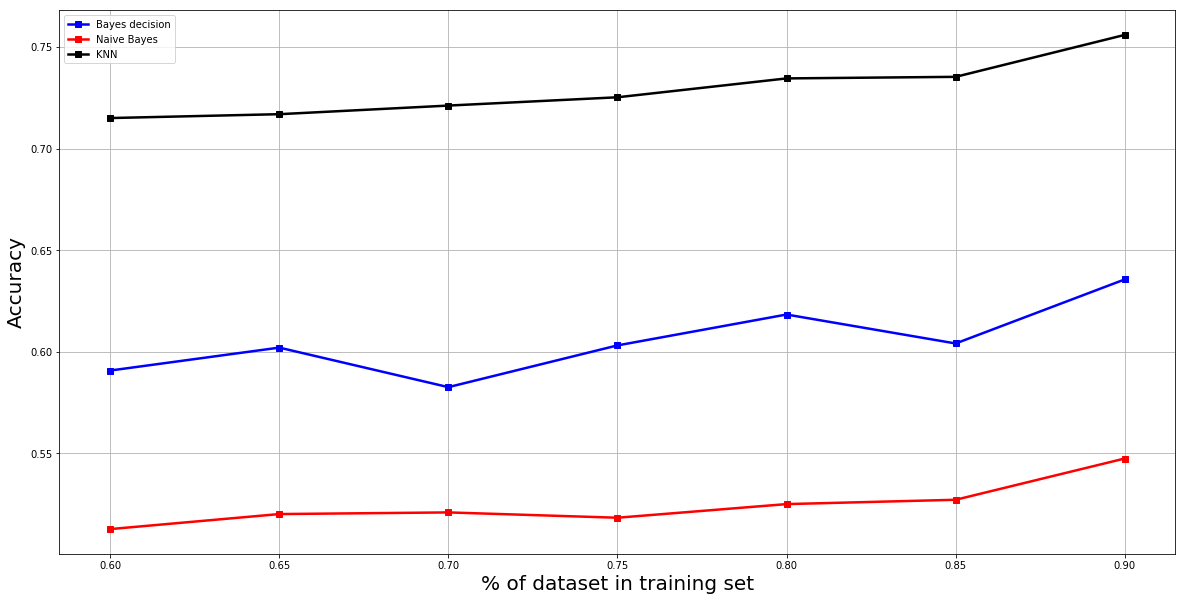

In [133]:
i = -1
colors = ['blue', 'red', 'black']
bayes_scores = []
nb_scores = []
knn_scores = []
plt.figure(figsize=(20,10)) 
Y = np.array(data[list_labels[-1]], dtype=str)
X = np.array(data[list_labels[0:12]])
for p in np.arange(0.6, 0.9, 0.05):    
    [bayes_accuracy, nb_accuracy, knn_accuracy] = return_accuracies(X, Y, p)
    bayes_scores.append(bayes_accuracy)
    nb_scores.append(nb_accuracy)
    knn_scores.append(knn_accuracy)

vp = np.arange(0.6, 0.9, 0.05)
print('Acurácias sem padronização')
plt.plot(vp, bayes_scores, marker='s', linestyle='-', color=colors[0], linewidth=2.5, label='Bayes decision')
plt.plot(vp, nb_scores, marker='s', linestyle='-', color=colors[1], linewidth=2.5, label='Naive Bayes')
plt.plot(vp, knn_scores, marker='s', linestyle='-', color=colors[2], linewidth=2.5, label='KNN')
plt.xlabel("% of dataset in training set", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.legend()

Acurácias com dados padronizados


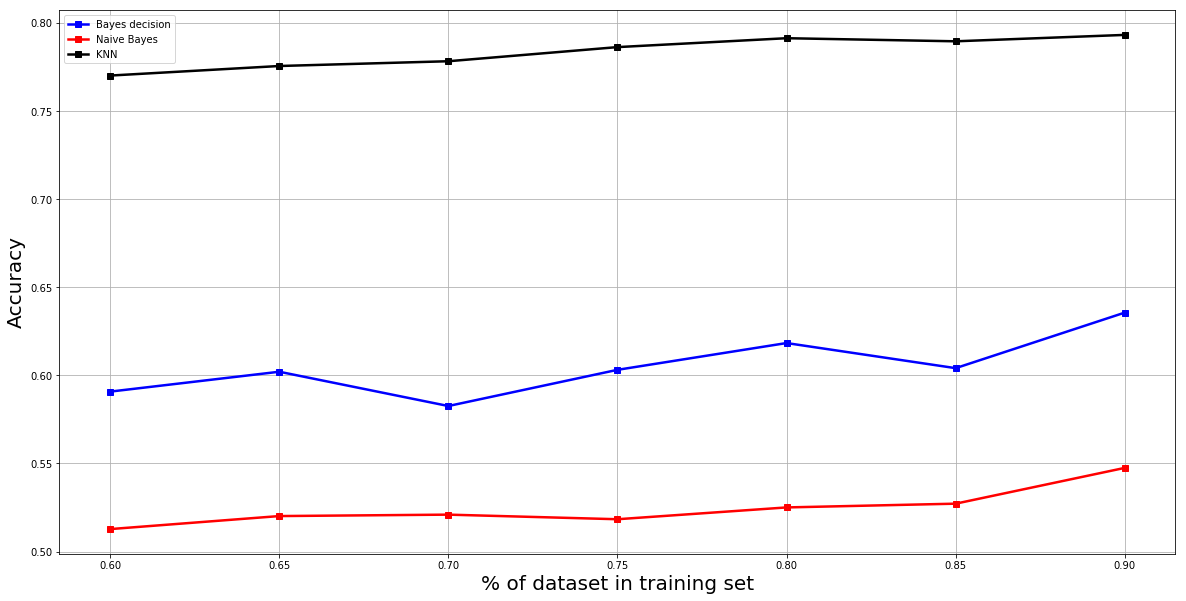

In [136]:
i = -1
colors = ['blue', 'red', 'black']
bayes_scores = []
nb_scores = []
knn_scores = []
plt.figure(figsize=(20,10)) 

Y = np.array(data[list_labels[-1]], dtype=str)
scaler = StandardScaler().fit(X)
X_standard = scaler.transform(X)

for p in np.arange(0.6, 0.9, 0.05):    
    [bayes_accuracy, nb_accuracy, knn_accuracy] = return_accuracies(X_standard, Y, p)
    bayes_scores.append(bayes_accuracy)
    nb_scores.append(nb_accuracy)
    knn_scores.append(knn_accuracy)

vp = np.arange(0.6, 0.9, 0.05)
print('Acurácias com dados padronizados')
plt.plot(vp, bayes_scores, marker='s', linestyle='-', color=colors[0], linewidth=2.5, label='Bayes decision')
plt.plot(vp, nb_scores, marker='s', linestyle='-', color=colors[1], linewidth=2.5, label='Naive Bayes')
plt.plot(vp, knn_scores, marker='s', linestyle='-', color=colors[2], linewidth=2.5, label='KNN')
plt.xlabel("% of dataset in training set", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.grid(True)
plt.legend()